In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# all dims taken from https://api.vex.com/vr/home/playgrounds/v5rc_high_stakes/field_details.html
field_size = 3600  # vex field is 3600mm x 3600mm
resolution = 50    # scale down to 72 x 72 grid, so each cell is 50mm x 50mm
grid_size = field_size // resolution  # num cells per side

occupancy_grid = np.zeros((grid_size, grid_size), dtype=int) # occ grid starts empty

In [4]:
# climb ladder leg positions
leg_positions = [
    (1800, 1200),
    (2400, 1800),
    (1800, 2400),
    (1200, 1800)
]

In [5]:
for leg_position in leg_positions:
    x, y = leg_position
    x_cell = x // resolution
    y_cell = y // resolution
    occupancy_grid[y_cell, x_cell] = 1

In [6]:
from skimage.graph import MCP_Geometric, route_through_array

# cost map for grid
input_cost_grid = np.ones((grid_size, grid_size), dtype=float)
input_cost_grid[occupancy_grid == 1] = np.inf

path = route_through_array(input_cost_grid, (0, 36), (71, 36))

In [ ]:
path = path[0] # path[1] is just the cost, but we don't really care about that. 

In [ ]:
path_real_world = [(x * resolution, y * resolution) for x, y in path] # For each cell in the path, we can just multiply by the resolution?

In [9]:
path_real_world

[(0, 1800),
 (50, 1800),
 (100, 1800),
 (150, 1800),
 (200, 1800),
 (250, 1800),
 (300, 1800),
 (350, 1800),
 (400, 1800),
 (450, 1800),
 (500, 1800),
 (550, 1800),
 (600, 1800),
 (650, 1800),
 (700, 1800),
 (750, 1800),
 (800, 1800),
 (850, 1800),
 (900, 1800),
 (950, 1800),
 (1000, 1800),
 (1050, 1800),
 (1100, 1800),
 (1150, 1800),
 (1200, 1750),
 (1250, 1750),
 (1300, 1750),
 (1350, 1750),
 (1400, 1750),
 (1450, 1750),
 (1500, 1750),
 (1550, 1750),
 (1600, 1750),
 (1650, 1750),
 (1700, 1750),
 (1750, 1750),
 (1800, 1750),
 (1850, 1750),
 (1900, 1750),
 (1950, 1750),
 (2000, 1750),
 (2050, 1750),
 (2100, 1750),
 (2150, 1750),
 (2200, 1750),
 (2250, 1750),
 (2300, 1750),
 (2350, 1750),
 (2400, 1750),
 (2450, 1750),
 (2500, 1750),
 (2550, 1750),
 (2600, 1750),
 (2650, 1750),
 (2700, 1750),
 (2750, 1750),
 (2800, 1750),
 (2850, 1750),
 (2900, 1750),
 (2950, 1750),
 (3000, 1750),
 (3050, 1750),
 (3100, 1750),
 (3150, 1750),
 (3200, 1750),
 (3250, 1750),
 (3300, 1750),
 (3350, 1750),
 (3

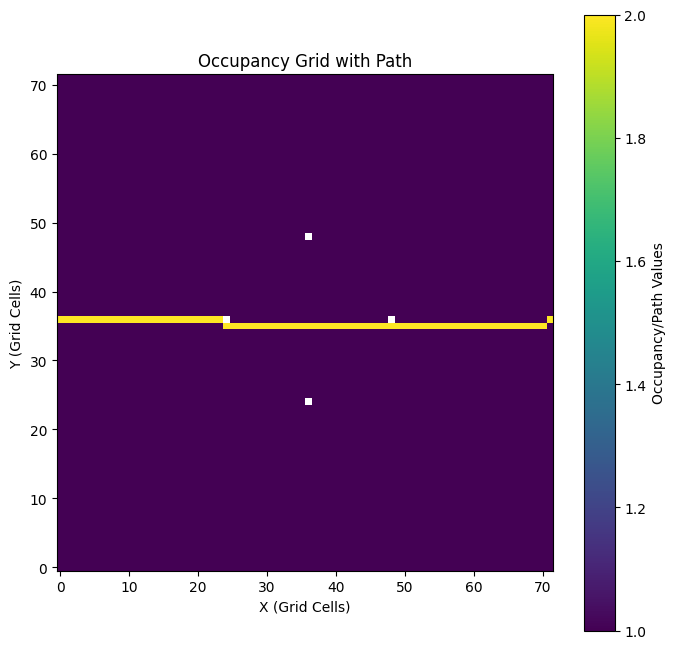

In [12]:
grid_with_path = input_cost_grid.copy()

# Mark the path cells in the grid
# chatgpt generated
for y, x in path:  # skimage returns (row, col) = (y, x)
    grid_with_path[x, y] = 2  # Use a distinct value for the path

# Plot the grid with the path
plt.figure(figsize=(8, 8))
plt.imshow(grid_with_path, cmap='viridis', origin='lower')
plt.colorbar(label='Occupancy/Path Values')
plt.title("Occupancy Grid with Path")
plt.xlabel("X (Grid Cells)")
plt.ylabel("Y (Grid Cells)")
plt.show()